# FINAL PROJECT THICKET

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [2]:
mpi_strong_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/strong/random/*.cali"))
mpi_strong_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/strong/reverse/*.cali"))
mpi_strong_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/strong/perturbed/*.cali"))
mpi_strong_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/strong/sorted/*.cali"))
mpi_weak_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/weak/random/*.cali"))
mpi_weak_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/weak/reverse/*.cali"))
mpi_weak_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/weak/perturbed/*.cali"))
mpi_weak_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/weak/sorted/*.cali"))

# CUDA Thicket Variables

In [3]:
cuda_strong_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/strong/random/*.cali"))
cuda_strong_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/strong/reverse/*.cali"))
cuda_strong_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/strong/perturbed/*.cali"))
cuda_strong_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/strong/sorted/*.cali"))
cuda_weak_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/weak/random/*.cali"))
cuda_weak_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/weak/reverse/*.cali"))
cuda_weak_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/weak/perturbed/*.cali"))
cuda_weak_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/weak/sorted/*.cali"))

In [4]:
tks = {}

tks["cuda_weak_sorted"] = cuda_weak_sorted_tk
tks["cuda_weak_reverse"] = cuda_weak_reverse_tk
tks["cuda_weak_random"] = cuda_weak_random_tk
tks["cuda_weak_perturbed"] = cuda_weak_perturbed_tk

tks["cuda_strong_sorted"] = cuda_strong_sorted_tk
tks["cuda_strong_reverse"] = cuda_strong_reverse_tk
tks["cuda_strong_random"] = cuda_strong_random_tk
tks["cuda_strong_perturbed"] = cuda_strong_perturbed_tk

tks["mpi_weak_sorted"] = mpi_weak_sorted_tk
tks["mpi_weak_reverse"] = mpi_weak_reverse_tk
tks["mpi_weak_random"] = mpi_weak_random_tk
tks["mpi_weak_perturbed"] = mpi_weak_perturbed_tk

tks["mpi_strong_sorted"] = mpi_strong_sorted_tk
tks["mpi_strong_reverse"] = mpi_strong_reverse_tk
tks["mpi_strong_random"] = mpi_strong_random_tk
tks["mpi_strong_perturbed"] = mpi_strong_perturbed_tk


In [5]:
# Performance data
tks["mpi_strong_random"].dataframe

nid  \
node                                              profile            
{'name': 'main', 'type': 'function'}              356069595      1   
                                                  929381149      1   
                                                  1749996013     1   
                                                  1793404269     1   
                                                  2123045578     1   
                                                  2147281759     1   
                                                  2503624591     1   
                                                  3293787369     1   
                                                  3448415519     1   
                                                  3768330772     1   
{'name': 'comm', 'type': 'function'}              356069595      3   
                                                  929381149      3   
                                                  1749996013     3   
                                                  1793404269     3   
                                                  2123045578     3   
                                                  2147281759     3   
                                                  2503624591     3   
                                                  3293787369     3   
                                                  3448415519     3   
                                                  3768330772     3   
{'name': 'MPI_Barrier', 'type': 'function'}       356069595      9   
                                                  929381149      4   
                                                  1749996013     9   
                                                  1793404269     9   
                                                  2123045578     4   
                                                  2147281759     9   
                                                  2503624591     9   
                                                  3293787369     9   
                                                  3448415519     4   
                                                  3768330772     9   
{'name': 'comm_large', 'type': 'function'}        356069595      4   
                                                  929381149     13   
                                                  1749996013     4   
                                                  1793404269     4   
                                                  2123045578    13   
                                                  2147281759     4   
                                                  2503624591     4   
                                                  3293787369     4   
                                                  3448415519    13   
                                                  3768330772     4   
{'name': 'MPI_Alltoallv', 'type': 'function'}     356069595     15   
                                                  929381149     14   
                                                  1749996013    15   
                                                  1793404269    15   
                                                  2123045578    14   
                                                  2147281759    15   
                                                  2503624591    15   
                                                  3293787369    15   
                                                  3448415519    14   
                                                  3768330772    15   
{'name': 'MPI_Gatherv', 'type': 'function'}       356069595     16   
                                                  929381149     15   
                                                  1749996013    16   
                                                  1793404269    16   
                                                  2123045578    15   
                                                  2147281759    16   
   

In [6]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["mpi_strong_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Alltoallv
│  │  ├─ 1.000 MPI_Gatherv
│  │  └─ 1.000 MPI_Scatter
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Allreduce
│     ├─ 1.000 MPI_Alltoall
│     ├─ 1.000 MPI_Bcast
│     └─ 1.000 MPI_Gather
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
tks["mpi_strong_random"].metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
356069595,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/weak/p16/sample_mpi_p16-a1048576_0...,true,1699996138,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,16,1,Handwritten
929381149,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p1024/sample_mpi_p1024-a1048576_0....,true,1700003114,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,1024,1,Handwritten
1749996013,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/weak_random_p32/sample_mpi_p32-a1048576_0...,true,1699994846,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,32,1,Handwritten
1793404269,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/weak/p8/sample_mpi_p8-a1048576_0.cali,true,1699996853,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,8,1,Handwritten
2123045578,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p256/sample_mpi_p256-a1048576_0.cali,true,1700001249,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,256,1,Handwritten
2147281759,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/weak_random_p64/sample_mpi_p64-a1048576_0...,true,1699994099,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,64,1,Handwritten
2503624591,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/weak/p4/sample_mpi_p4-a1048576_0.cali,true,1699997394,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,4,1,Handwritten
3293787369,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/weak_random/sample_mpi_p128-a1048576_0.cali,true,1699991682,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,128,1,Handwritten
3448415519,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,outs/random/p512/sample_mpi_p512-a1048576_0.cali,true,1700001350,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample_mpi, 1048576, 0]",c,SampleSort,MPI,float,4,1048576,Random,512,1,Handwritten


In [8]:
gbs = {}

for i in tks.keys():
    if "strong" in i:
        gbs[i] = tks[i].groupby("InputSize")
    else:
        gbs[i] = tks[i].groupby("num_threads")


1  thickets created...
{2048: <thicket.thicket.Thicket object at 0x2b9504675520>}
1  thickets created...
{2048: <thicket.thicket.Thicket object at 0x2b95045306a0>}
1  thickets created...
{2048: <thicket.thicket.Thicket object at 0x2b9504638dc0>}
1  thickets created...
{2048: <thicket.thicket.Thicket object at 0x2b95044fcbe0>}
1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b95048e5730>}
1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b9504841c40>}
1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b9504785250>}
1  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b9504824dc0>}
1  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b9504836b80>}
1  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b950476fbb0>}
1  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b950474f9d0>}
1  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b9504749730>}
1  thickets crea

Compose these 3 groups column-wise to get a holistic view of the data

In [9]:
print(gbs.keys())

dict_keys(['cuda_weak_sorted', 'cuda_weak_reverse', 'cuda_weak_random', 'cuda_weak_perturbed', 'cuda_strong_sorted', 'cuda_strong_reverse', 'cuda_strong_random', 'cuda_strong_perturbed', 'mpi_weak_sorted', 'mpi_weak_reverse', 'mpi_weak_random', 'mpi_weak_perturbed', 'mpi_strong_sorted', 'mpi_strong_reverse', 'mpi_strong_random', 'mpi_strong_perturbed'])


In [10]:
ctks = {}

for i in gbs.keys():
    if "strong" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="InputSize"
        )

In [11]:
# mpi_strong_random_ctk.dataframe

ctks["mpi_strong_random"].dataframe

1048576  \
                                                                  nid   
node                                              num_threads           
{'name': 'main', 'type': 'function'}              2                 1   
                                                  4                 1   
                                                  8                 1   
                                                  16                1   
                                                  32                1   
                                                  64                1   
                                                  128               1   
                                                  256               1   
                                                  512               1   
                                                  1024              1   
{'name': 'comm', 'type': 'function'}              2                 3   
                                                  4                 3   
                                                  8                 3   
                                                  16                3   
                                                  32                3   
                                                  64                3   
                                                  128               3   
                                                  256               3   
                                                  512               3   
                                                  1024              3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                 9   
                                                  4                 9   
                                                  8                 9   
                                                  16                9   
                                                  32                9   
                                                  64                9   
                                                  128               9   
                                                  256               4   
                                                  512               4   
                                                  1024              4   
{'name': 'comm_large', 'type': 'function'}        2                 4   
                                                  4                 4   
                                                  8                 4   
                                                  16                4   
                                                  32                4   
                                                  64                4   
                                                  128               4   
                                                  256              13   
                                                  512              13   
                                                  1024             13   
{'name': 'MPI_Alltoallv', 'type': 'function'}     2                15   
                                                  4                15   
                                                  8                15   
                                                  16               15   
                                                  32               15   
                                                  64               15   
                                                  128              15   
                                                  256              14   
                                                  512              14   
                                                  1024             14   
{'name': 'MPI_Gatherv', 'type': 'function'}       2                16   
                                                  4                16   
                                               

In [12]:
ctks["mpi_weak_random"].dataframe

128  \
                                                              nid   
node                                              InputSize         
{'name': 'main', 'type': 'function'}              65536         1   
                                                  262144        1   
                                                  1048576       1   
                                                  4194304       1   
                                                  16777216      1   
                                                  67108864      1   
{'name': 'comm', 'type': 'function'}              65536         3   
                                                  262144        3   
                                                  1048576       3   
                                                  4194304       3   
                                                  16777216      3   
                                                  67108864      3   
{'name': 'MPI_Barrier', 'type': 'function'}       65536         9   
                                                  262144        9   
                                                  1048576       9   
                                                  4194304       9   
                                                  16777216      4   
                                                  67108864      4   
{'name': 'comm_large', 'type': 'function'}        65536         4   
                                                  262144        4   
                                                  1048576       4   
                                                  4194304       4   
                                                  16777216     13   
                                                  67108864     13   
{'name': 'MPI_Alltoallv', 'type': 'function'}     65536        15   
                                                  262144       15   
                                                  1048576      15   
                                                  4194304      15   
                                                  16777216     14   
                                                  67108864     14   
{'name': 'MPI_Gatherv', 'type': 'function'}       65536        16   
                                                  262144       16   
                                                  1048576      16   
                                                  4194304      16   
                                                  16777216     15   
                                                  67108864     15   
{'name': 'MPI_Scatter', 'type': 'function'}       65536         5   
                                                  262144        5   
                                                  1048576       5   
                                                  4194304       5   
                                                  16777216   <NA>   
                                                  67108864   <NA>   
{'name': 'comm_small', 'type': 'function'}        65536        10   
                                                  262144       10   
                                                  1048576      10   
                                                  4194304      10   
                                                  16777216      8   
                                                  67108864      8   
{'name': 'MPI_Allreduce', 'type': 'function'}     65536        14   
                                                  262144       14   
                                                  1048576      14   
                                                  4194304      14   
                                                  16777216     12   
                                                  67108864     12   
{'name': 'MPI_Alltoall', 'type': 'function'}      65536        13   
                                                  262144    

# STOPPED HERE, EVERYTHING BELOW IS NOT UPDATED

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
for i in ctks.keys():
    if "strong" in i:
        if "cuda" in i:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
            #ctks[i].dataframe.columns = ctks[i].dataframe.columns.droplevel(1)
        else: 
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (1048576, "nid"), (1048576, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
            #ctks[i].dataframe.columns = ctks[i].dataframe.columns.droplevel(1)
    else:
        if "cuda" in i:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (2048, "nid"), (2048, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
        else:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (128, "nid"), (128, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [94]:
ctks["cuda_weak_random"].dataframe

2048                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.506251      0.506251      0.506251   
                  262144         0.599485      0.599485      0.599485   
                  1048576        0.999880      0.999880      0.999880   
                  4194304        1.015660      1.015660      1.015660   
                  16777216       2.325486      2.325486      2.325486   
                  67108864      21.114967     21.114967     21.114967   
                  268435456     17.223025     17.223025     17.223025   
comm              65536          0.000409      0.000409      0.000409   
                  262144         0.000951      0.000951      0.000951   
                  1048576        0.003642      0.003642      0.003642   
                  4194304        0.022712      0.022712      0.022712   
                  16777216       0.153147      0.153147      0.153147   
                  67108864       1.854621      1.854621      1.854621   
                  268435456      0.677950      0.677950      0.677950   
comm_large        65536          0.000206      0.000206      0.000206   
                  262144         0.000666      0.000666      0.000666   
                  1048576        0.002055      0.002055      0.002055   
                  4194304        0.010255      0.010255      0.010255   
                  16777216       0.036848      0.036848      0.036848   
                  67108864       0.117533      0.117533      0.117533   
                  268435456      0.468721      0.468721      0.468721   
cudaMemcpy        65536          0.000176      0.000176      0.000176   
                  262144         0.000621      0.000621      0.000621   
                  1048576        0.002009      0.002009      0.002009   
                  4194304        0.010216      0.010216      0.010216   
                  16777216       0.036781      0.036781      0.036781   
                  67108864       0.117468      0.117468      0.117468   
                  268435456      0.468660      0.468660      0.468660   
comm_small        65536          0.000111      0.000111      0.000111   
                  262144         0.000182      0.000182      0.000182   
                  1048576        0.001485      0.001485      0.001485   
                  4194304        0.012362      0.012362      0.012362   
                  16777216       0.116183      0.116183      0.116183   
                  67108864       1.736969      1.736969      1.736969   
                  268435456      0.209105      0.209105      0.209105   
cudaMemcpy        65536          0.000071      0.000071      0.000071   
                  262144         0.000135      0.000135      0.000135   
                  1048576        0.001423      0.001423      0.001423   
                  4194304        0.012309      0.012309      0.012309   
                  16777216       0.116106      0.116106      0.116106   
                  67108864       1.736864      1.736864      1.736864   
                  268435456      0.209044      0.209044      0.209044   
comp              65536          0.000146      0.000146      0.000146   
                  262144         0.000876      0.000876      0.000876   
                  1048576        0.014170      0.014170      0.014170   
                  4194304        0.263740      0.263740      0.263740   
                  16777216       1.407193      1.407193      1.407193   
                  67108864      17.219580     17.219580     17.219580   
                  268435456      9.455116      9.455116      9.455116   
comp_large        65536          0.000035      0.000035      0.000035   
                  262144         0.000047      0.000047      0.000047   
                  1048576        0.000052      0.000052      0.000052   
                  4194

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [15]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [16]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [38]:
ctks["cuda_weak_random"].dataframe.loc["main"]

2048                                         \
          Min time/rank Max time/rank Avg time/rank Total time   
InputSize                                                        
65536          0.506251      0.506251      0.506251   0.506251   
262144         0.599485      0.599485      0.599485   0.599485   
1048576        0.999880      0.999880      0.999880   0.999880   
4194304        1.015660      1.015660      1.015660   1.015660   
16777216       2.325486      2.325486      2.325486   2.325486   
67108864      21.114967     21.114967     21.114967  21.114967   
268435456     17.223025     17.223025     17.223025  17.223025   

                                                                                
          Avg GPU time/rank Min GPU time/rank Max GPU time/rank Total GPU time  
InputSize                                                                       
65536              0.000053          0.000053          0.000053       0.000053  
262144             0.000196          0.000196          0.000196       0.000196  
1048576            0.001608          0.001608          0.001608       0.001608  
4194304            0.020516          0.020516          0.020516       0.020516  
16777216           0.149340          0.149340          0.149340       0.149340  
67108864           1.852288          1.852288          1.852288       1.852288  
268435456          0.675924          0.675924          0.675924       0.675924

In [49]:
ctks["mpi_strong_reverse"].dataframe.loc["comp_large"]

1048576                                         \
            Min time/rank Max time/rank Avg time/rank Total time   
num_threads                                                        
2                0.067384      0.171095      0.119239   0.238479   
4                0.066631      0.155612      0.119131   0.476524   
8                0.080450      0.162385      0.105336   0.842690   
16               0.007832      0.158686      0.076486   1.223781   
32               0.002876      0.153700      0.035622   1.139918   
64               0.000995      0.312405      0.021163   1.354420   
128              0.000915      0.120648      0.010861   1.390206   
256              0.000383      0.182096      0.010867   2.781912   
512              0.000582      0.109367      0.008289   4.244213   
1024             0.001465      0.304411      0.030143  30.866399   

                                
            Variance time/rank  
num_threads                     
2                     0.002689  
4                     0.001168  
8                     0.000771  
16                    0.001530  
32                    0.002399  
64                    0.002353  
128                   0.000536  
256                   0.000728  
512                   0.000362  
1024                  0.002835

In [54]:
ctks["mpi_weak_reverse"].dataframe.loc["comp_large"]

128                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
65536          0.000156      0.012634      0.000546     0.069868   
262144         0.000333      0.227459      0.004013     0.513642   
1048576        0.000915      0.120648      0.010861     1.390206   
4194304        0.002041      0.741240      0.224785    28.772429   
16777216       0.320114      3.328536      1.742813   223.080035   
67108864       1.786935     14.777340      8.677026  1110.659343   

                              
          Variance time/rank  
InputSize                     
65536               0.000002  
262144              0.000518  
1048576             0.000536  
4194304             0.033089  
16777216            0.565347  
67108864            8.960978

In [44]:
function_names = ("main", "comp", "comm", "comm_small", "comm_large", "comp_small", "comp_large")
# function_names = set(ctks["mpi_strong_perturbed"].dataframe.index.get_level_values("name"))

# MPI GRAPHS

In [74]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_random"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 

masterDF

,main,comp,comm,comm_small,comm_large,comp_small,comp_large
2,1.001056,0.334143,0.215303,0.030113,0.049476,0.000022,0.334021
4,1.517221,0.332491,0.345486,0.065308,0.091160,0.000022,0.332370
8,2.374456,0.330093,0.585490,0.174316,0.142161,0.000020,0.329981
16,4.681954,0.308683,1.402997,0.442014,0.563216,0.000021,0.305696
32,10.799218,0.256429,4.013115,1.345144,1.312616,0.000026,0.256306
64,13.486917,0.100229,0.771897,0.179333,0.277921,0.000033,0.098567
128,12.611330,0.020951,2.389330,0.860558,0.911174,0.000071,0.020754
256,14.860865,0.018361,3.608854,1.441922,1.121210,0.002342,0.015789
512,23.397431,0.018200,6.184523,3.702004,1.177754,0.006544,0.011272
1024,30.113245,0.051875,16.080287,12.925450,0.957977,0.025311,0.026212


<Axes: title={'center': 'SampleSort MPI Random Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

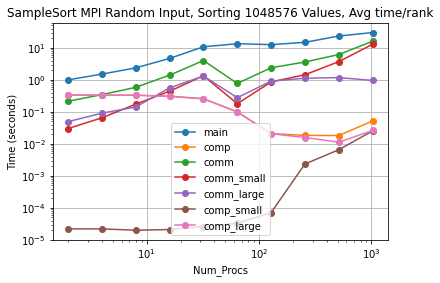

In [93]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_random"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Random Input, Sorting 1048576 Values, Avg time/rank",
    xlabel="Num_Procs",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI Sorted Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

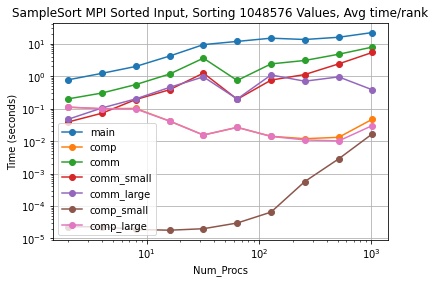

In [90]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_sorted"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Sorted Input, Sorting 1048576 Values, Avg time/rank",
    xlabel="Num_Procs",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI 1%Perturbed Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

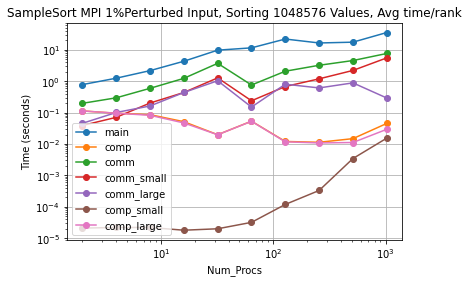

In [89]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_perturbed"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI 1%Perturbed Input, Sorting 1048576 Values, Avg time/rank",
    xlabel="Num_Procs",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI Reverse Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

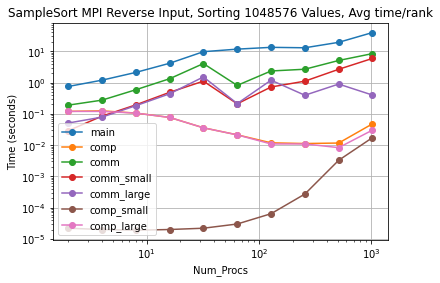

In [88]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_reverse"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Reverse Input, Sorting 1048576 Values, Avg time/rank",
    xlabel="Num_Procs",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI Random Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

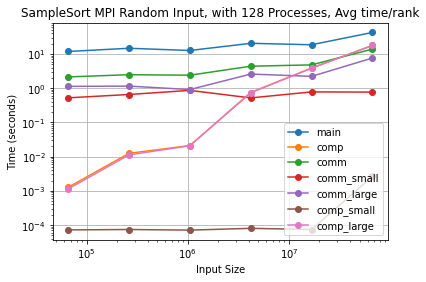

In [87]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_random"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Random Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI Sorted Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

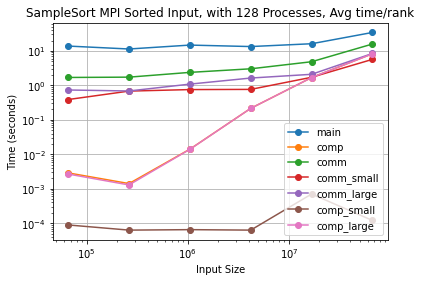

In [86]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_sorted"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Sorted Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI Reverse Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

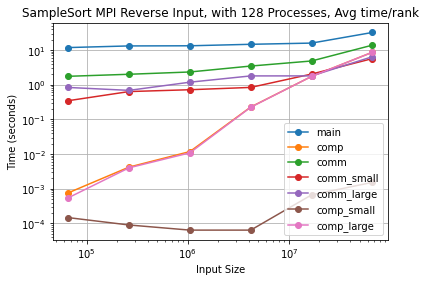

In [85]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_reverse"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI Reverse Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort MPI 1%Perturbed Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

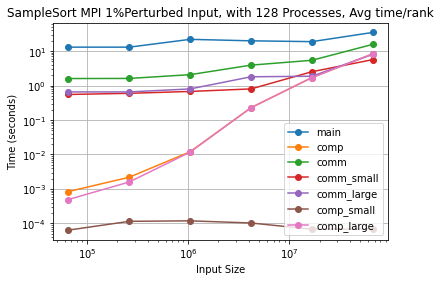

In [84]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_perturbed"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort MPI 1%Perturbed Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

# CUDA GRAPHS

<Axes: title={'center': 'SampleSort CUDA Random Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Threads', ylabel='Time (seconds)'>

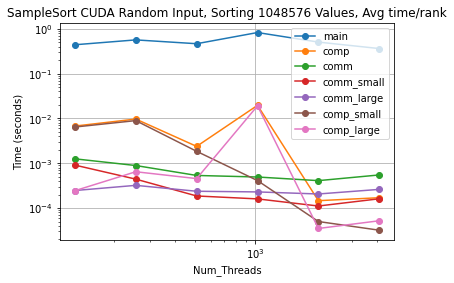

In [96]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_strong_random"].dataframe.loc[name][(65536, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Random Input, Sorting 65536 Values, Avg time/rank",
    xlabel="Num_Threads",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA Sorted Input, Sorting 65536 Values, Avg time/rank'}, xlabel='Num_Threads', ylabel='Time (seconds)'>

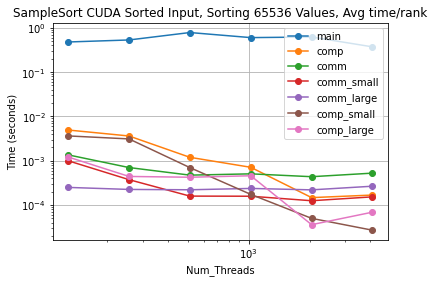

In [97]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_strong_sorted"].dataframe.loc[name][(65536, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Sorted Input, Sorting 65536 Values, Avg time/rank",
    xlabel="Num_Threads",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA Reverse Input, Sorting 65536 Values, Avg time/rank'}, xlabel='Num_Threads', ylabel='Time (seconds)'>

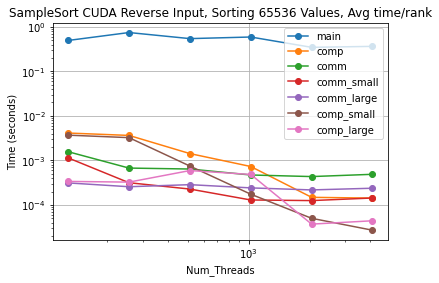

In [98]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_strong_reverse"].dataframe.loc[name][(65536, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Reverse Input, Sorting 65536 Values, Avg time/rank",
    xlabel="Num_Threads",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA 1%Perturbed Input, Sorting 65536 Values, Avg time/rank'}, xlabel='Num_Threads', ylabel='Time (seconds)'>

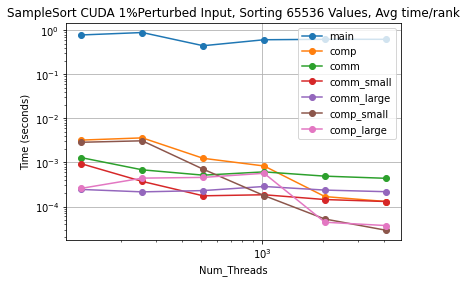

In [99]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_strong_perturbed"].dataframe.loc[name][(65536, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA 1%Perturbed Input, Sorting 65536 Values, Avg time/rank",
    xlabel="Num_Threads",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA Random Input, with 2048 Threads, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

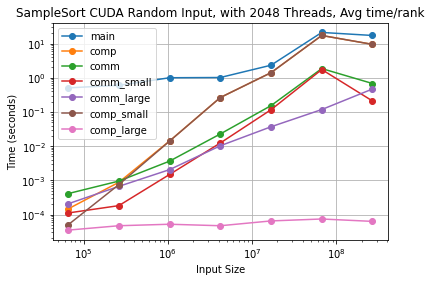

In [100]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_random"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Random Input, with 2048 Threads, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA Sorted Input, with 2048 Threads, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

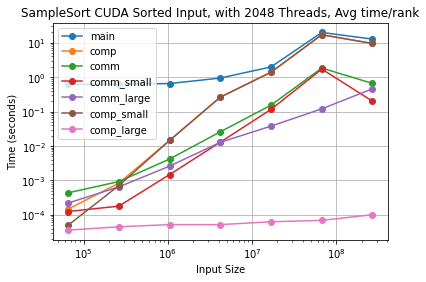

In [101]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_sorted"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Sorted Input, with 2048 Threads, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA Reverse Input, with 2048 Threads, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

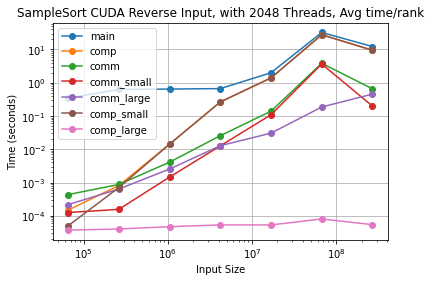

In [102]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_reverse"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA Reverse Input, with 2048 Threads, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'SampleSort CUDA 1%Perturbed Input, with 2048 Threads, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

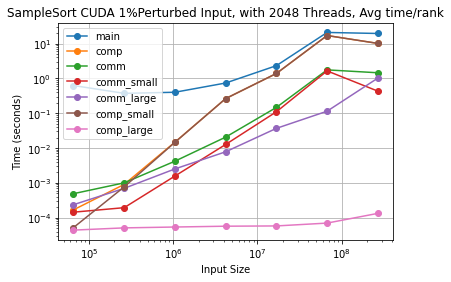

In [103]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_perturbed"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="SampleSort CUDA 1%Perturbed Input, with 2048 Threads, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

## Speedup

In [118]:
ctks["mpi_strong_random"].dataframe.reset_index().drop("num_threads", axis=1).set_index("name")#/ctks["mpi_strong_random"].dataframe

<ipython-input-118-2dfb4940e57d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctks["mpi_strong_random"].dataframe.reset_index().drop("num_threads", axis=1).set_index("name")#/ctks["mpi_strong_random"].dataframe


1048576                                            \
                  Min time/rank Max time/rank Avg time/rank    Total time   
name                                                                        
main                   0.994806      1.007307      1.001056      2.002113   
main                   1.496862      1.531642      1.517221      6.068885   
main                   2.317955      2.412676      2.374456     18.995646   
main                   4.564660      4.783167      4.681954     74.911261   
main                  10.559323     11.096437     10.799218    345.574971   
main                  13.098525     14.552916     13.486917    863.162672   
main                  11.939993     13.020449     12.611330   1614.250236   
main                  13.989345     15.233355     14.860865   3804.381537   
main                  22.588113     23.994056     23.397431  11979.484918   
main                  29.059940     30.710559     30.113245  30835.962580   
comm                   0.141299      0.289307      0.215303      0.430606   
comm                   0.261130      0.401408      0.345486      1.381945   
comm                   0.535018      0.700082      0.585490      4.683918   
comm                   1.316133      1.488298      1.402997     22.447952   
comm                   3.746634      4.283326      4.013115    128.419689   
comm                   0.481883      1.093153      0.771897     49.401432   
comm                   1.973164      2.700251      2.389330    305.834230   
comm                   3.024473      3.962029      3.608854    923.866668   
comm                   3.917985      6.611558      6.184523   3166.475789   
comm                   5.936741     16.997963     16.080287  16466.213818   
MPI_Barrier            0.059680      0.211478      0.135579      0.271159   
MPI_Barrier            0.086934      0.278306      0.188874      0.755498   
MPI_Barrier            0.166504      0.364369      0.268861      2.150889   
MPI_Barrier            0.175248      0.575355      0.397611      6.361772   
MPI_Barrier            0.852572      1.673349      1.355170     43.365452   
MPI_Barrier            0.159804      0.564175      0.313075     20.036816   
MPI_Barrier            0.318811      0.911172      0.617389     79.025812   
MPI_Barrier            0.758112      1.652928      1.044439    267.376327   
MPI_Barrier            0.721089      1.943579      1.304361    667.832847   
MPI_Barrier            1.198768      3.273854      2.196249   2248.958990   
comm_large             0.046133      0.052818      0.049476      0.098951   
comm_large             0.057423      0.114599      0.091160      0.364638   
comm_large             0.091390      0.203008      0.142161      1.137289   
comm_large             0.422415      0.728272      0.563216      9.011452   
comm_large             1.029245      1.964558      1.312616     42.003727   
comm_large             0.029447      0.545763      0.277921     17.786951   
comm_large             0.391313      1.433043      0.911174    116.630218   
comm_large             0.364715      1.464600      1.121210    287.029881   
comm_large             0.265116      1.593528      1.177754    603.009923   
comm_large             0.413575      1.756193      0.957977    980.967944   
MPI_Alltoallv          0.021458      0.022845      0.022151      0.044302   
MPI_Alltoallv          0.040733      0.080188      0.057600      0.230402   
MPI_Alltoallv          0.046144      0.098024      0.069137      0.553099   
MPI_Alltoallv          0.284256      0.447992      0.391364      6.261822   
MPI_Alltoallv          0.576261      0.963990      0.822325     26.314392   
MPI_Alltoallv          0.021828      0.150366      0.091048      5.827095   
MPI_Alltoallv          0.157253      0.469070      0.324145     41.490624   
MPI_Alltoallv          0.165406      0.706696      0.560957    143.604878   
MPI_Alltoallv          0.265046      0.758226      0.598398    306.379964   
MPI_Alltoallv       

In [111]:
speedup_df = ctks["mpi_strong_random"].dataframe #.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe


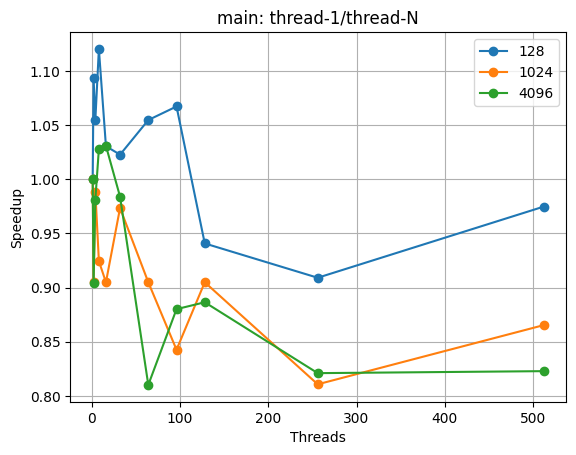

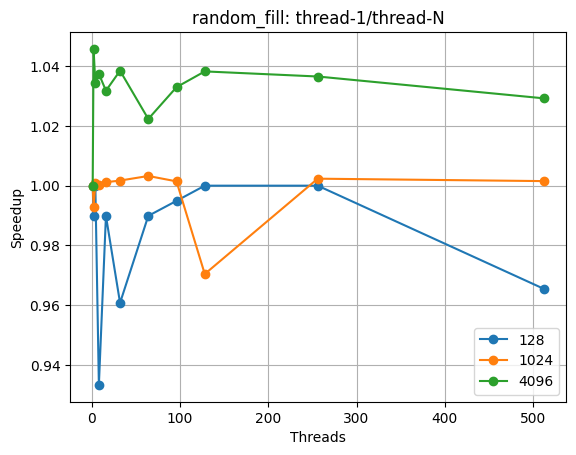

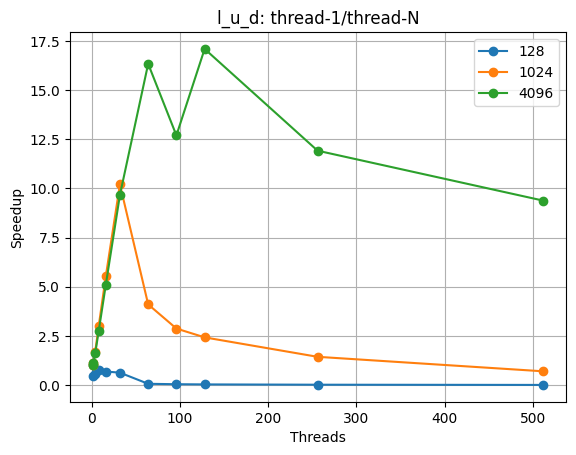

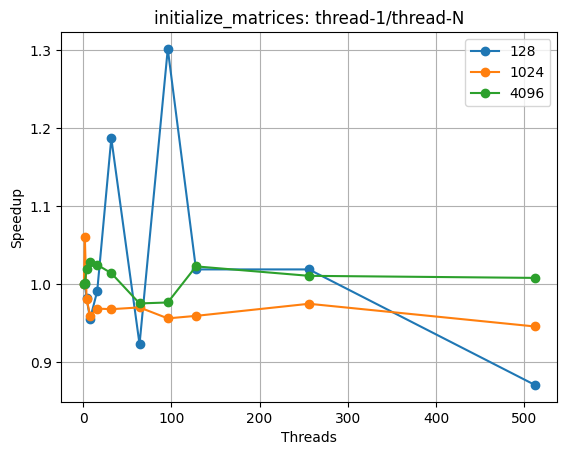

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )